In [20]:
from pathlib import Path
import mne
import sys
parentPath = Path.cwd().parent
sys.path.insert(0, str(parentPath))  # add project root

PosixPath('/Users/sumachinta/Library/CloudStorage/OneDrive-CytoTronics/github/Motor-Imagery-EEG-Classifier')

In [8]:
import sys, importlib.util, os
print("Root on path?", any(p.endswith("Motor-Imagery-EEG-Classifier") for p in sys.path))
print("Found src?", importlib.util.find_spec("src") is not None)
print("PYTHONPATH=", os.environ.get("PYTHONPATH"))



Root on path? True
Found src? True
PYTHONPATH= ~/Library/CloudStorage/OneDrive-CytoTronics/github/Motor-Imagery-EEG-Classifier


In [11]:
from src.utils_io import set_seeds
set_seeds(42)

In [21]:
DATA = Path(f"{parentPath}/data/raw")      # adjust if needed
EDF = next(DATA.glob("*.edf"))  # first .edf file in data/raw
EDF

PosixPath('/Users/sumachinta/Library/CloudStorage/OneDrive-CytoTronics/github/Motor-Imagery-EEG-Classifier/data/raw/S001R01.edf')

In [22]:
# Cell 2 — load raw
raw = mne.io.read_raw_edf(str(EDF), preload=True, verbose=False)
print(raw)
print("Sampling rate:", raw.info["sfreq"], "Hz")


<RawEDF | S001R01.edf, 64 x 9760 (61.0 s), ~4.8 MiB, data loaded>
Sampling rate: 160.0 Hz


In [24]:
# Cell 3 — basic clean: notch + bandpass + average reference
raw_proc = raw.copy().load_data()
# choose 60 for US, 50 elsewhere
raw_proc.notch_filter([60], verbose=False)
raw_proc.filter(l_freq=1., h_freq=40., phase='zero', fir_design='firwin', verbose=False)
raw_proc, _ = mne.set_eeg_reference(raw_proc, 'average')
print(raw_proc)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
<RawEDF | S001R01.edf, 64 x 9760 (61.0 s), ~4.8 MiB, data loaded>


In [25]:
# Cell 4 — visualize 5 seconds
mne.viz.plot_raw(raw_proc, duration=5.0, n_channels=16, scalings="auto", title="Cleaned EEG (5s)")


Using qt as 2D backend.
Using pyopengl with version 3.1.10


Channels marked as bad:
none


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


/Users/sumachinta/miniforge3/envs/neurodecode/lib/python3.11/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


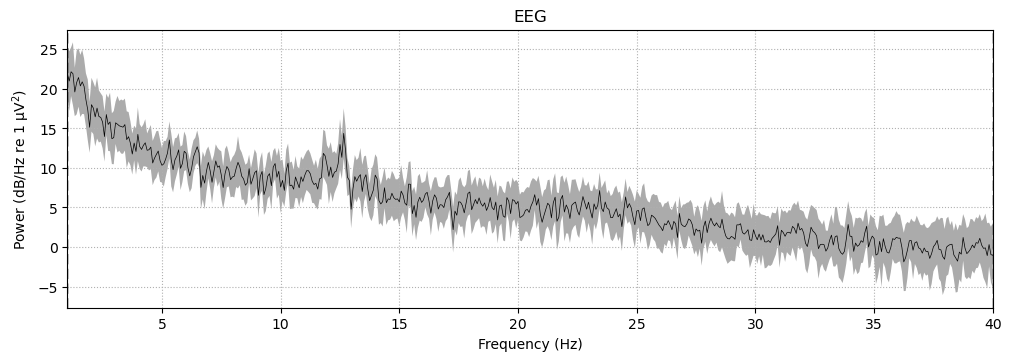

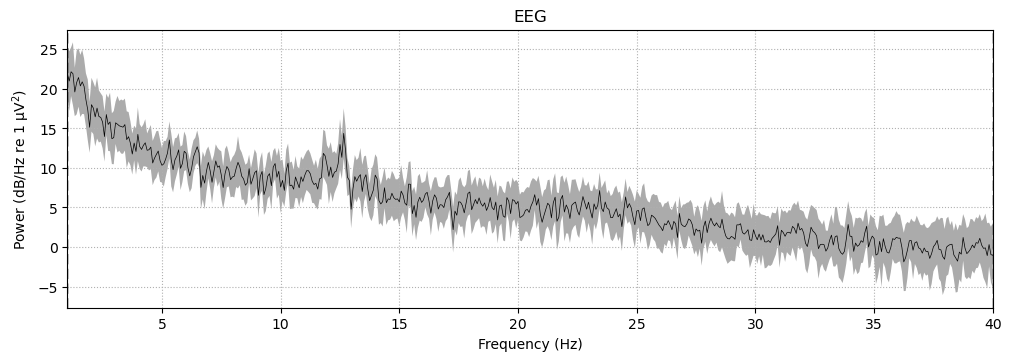

In [26]:
# Cell 5 — quick PSD (Welch)
raw_proc.plot_psd(fmin=1, fmax=40, average=True)
